#### Audio Classification Data Preprocessing

In [1]:
import librosa
audio_file_path='monoGuitarDataset/humbucker/G61-61406-1111-20638.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.6632294e-08
 -3.6528618e-08  3.5547952e-08]


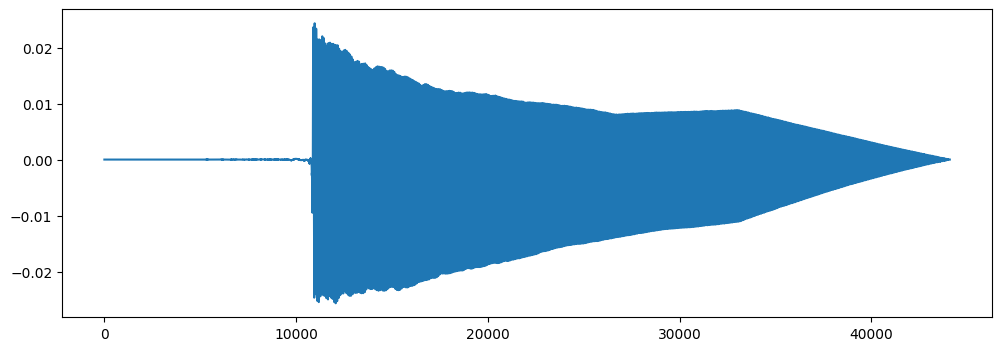

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

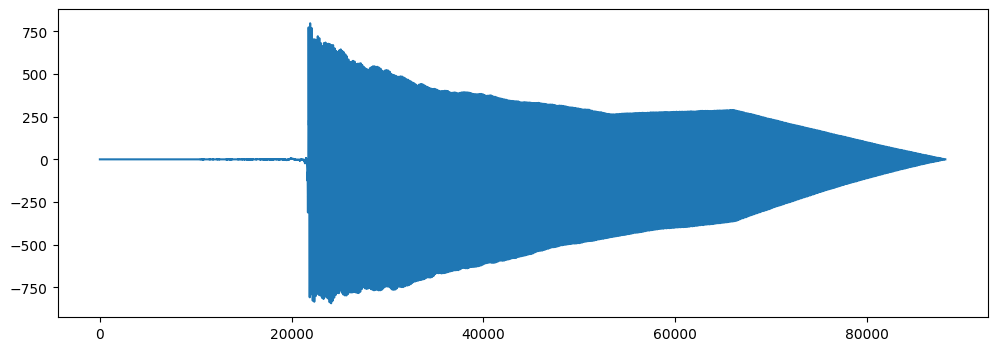

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
MFCC = 40
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=MFCC)
print(mfccs.shape)

(40, 87)


In [8]:
mfccs

array([[-859.122    , -859.122    , -859.122    , ..., -828.47107  ,
        -832.5501   , -837.188    ],
       [   0.       ,    0.       ,    0.       , ...,   38.480064 ,
          33.677975 ,   28.340456 ],
       [   0.       ,    0.       ,    0.       , ...,   25.846972 ,
          23.387428 ,   21.150188 ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,   -8.253315 ,
          -6.8534584,   -3.6832752],
       [   0.       ,    0.       ,    0.       , ...,   -6.7347765,
          -5.596876 ,   -3.45398  ],
       [   0.       ,    0.       ,    0.       , ...,   -5.0247326,
          -4.4952154,   -3.526144 ]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='monoGuitarDataset/'
metadata=pd.read_csv('guitarMetadata.csv')
metadata.head()

,slice_file_name,class
0,G61-40100-1111-20593.wav,humbucker
1,G61-41101-1111-20594.wav,humbucker
2,G61-42102-1111-20595.wav,humbucker
3,G61-43103-1111-20596.wav,humbucker
4,G61-44104-1111-20597.wav,humbucker


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=MFCC)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [11]:
import numpy as np
#tdqm lets us see progress
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), row["class"], str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

624it [00:09, 66.21it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-703.2584, 165.53738, 70.0089, 18.935406, 12....",humbucker
1,"[-726.12634, 128.2249, 75.36604, 38.232216, 22...",humbucker
2,"[-743.83875, 115.465935, 70.00808, 37.364796, ...",humbucker
3,"[-767.951, 116.55508, 63.443382, 30.931671, 18...",humbucker
4,"[-765.99164, 119.55817, 60.816498, 27.50524, 1...",humbucker


In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(624, 40)

In [15]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
# use label encoder instead

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [16]:
y.shape

(624, 2)

In [17]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
X_train

array([[-6.71178589e+02,  8.93503418e+01, -1.33324709e+01, ...,
         5.79062641e-01, -1.91476364e+01, -1.72923985e+01],
       [-7.37766968e+02,  1.29312271e+02,  7.85324783e+01, ...,
        -3.15438771e+00, -4.18283892e+00, -3.64879847e+00],
       [-6.86562561e+02,  7.73570328e+01, -1.69142609e+01, ...,
         1.23376350e+01,  9.22439957e+00, -1.45665483e+01],
       ...,
       [-7.91430237e+02,  6.75216751e+01,  7.71037674e+00, ...,
         3.87557387e+00, -2.82533340e+01, -1.27640200e+01],
       [-7.89962830e+02,  1.06585075e+02,  1.46708632e+01, ...,
         1.29555702e+01,  1.16652737e+01, -1.65848827e+00],
       [-7.72269592e+02,  8.10760956e+01,  4.48640633e+01, ...,
        -1.18577127e+01, -1.24375801e+01, -1.19898386e+01]], dtype=float32)

In [19]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [20]:
X_train.shape

(499, 40)

In [21]:
X_test.shape

(125, 40)

In [22]:
y_train.shape

(499, 2)

In [23]:
y_test.shape

(125, 2)

### Model Creation

In [24]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [26]:
### No of classes
num_labels=y.shape[1]

In [27]:
#Dense()

In [28]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(MFCC,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(75))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###third layer
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.2))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/Users/aronconnors/anaconda3/envs/noiseClassifier/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,577 (60.85 KB)

 Trainable params: 15,577 (60.85 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 7s 477ms/step - accuracy: 0.5000 - loss: 43.0578
Epoch 1: val_loss improved from inf to 2.28504, saving model to saved_models/audio_classification.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4905 - loss: 26.6581 - val_accuracy: 0.5200 - val_loss: 2.2850
Epoch 2/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6562 - loss: 10.2985
Epoch 2: val_loss did not improve from 2.28504
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5003 - loss: 11.9713 - val_accuracy: 0.5120 - val_loss: 4.6690
Epoch 3/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3750 - loss: 13.4086
Epoch 3: val_loss did not improve from 2.28504
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4420 - loss: 10.0993 - val_accuracy: 0.4960 - val_loss: 2.6813
Epoch 4/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5312 - loss: 5.2580
Epoch 4: val_loss improved from 2.28504 to 1.09870, saving model to saved_models/audio_classification.keras
1

Test Loss: 0.6921
Test Accuracy: 0.5360
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        64
           1       0.53      0.46      0.49        61

    accuracy                           0.54       125
   macro avg       0.53      0.53      0.53       125
weighted avg       0.54      0.54      0.53       125



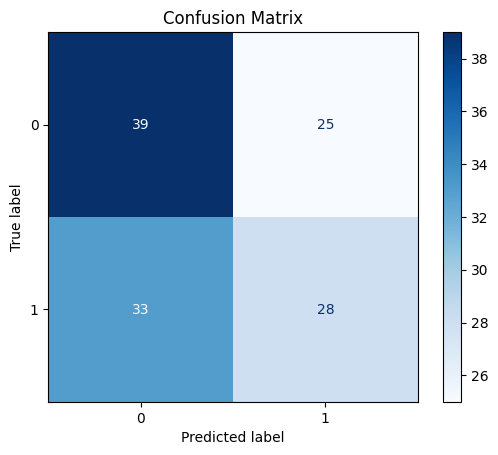

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict classes
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()